In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [290]:
df = pd.read_csv('car_dataset.csv')

In [291]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [292]:
df.shape

(8128, 12)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [294]:
# Convert 'max_power' to numeric (coerce errors to NaN)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [295]:
df.fillna(df.median(numeric_only=True), inplace=True) # filling null values with median we can also use mean


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [297]:
df.drop('name',axis = 1 ,inplace = True) # droppped 'name, not useful for regression

In [298]:
#categorical_columns
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Apply one-hot encoding and convert booleans to 0/1
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Converted  boolean columns (True/False) to integers (1/0)
df = df.astype(int)


In [299]:
df.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23,1248,74,5,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21,1498,103,5,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17,1497,78,5,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23,1396,90,5,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16,1298,88,5,0,0,1,1,0,1,0,0,0,0


In [300]:
df.shape

(8128, 17)

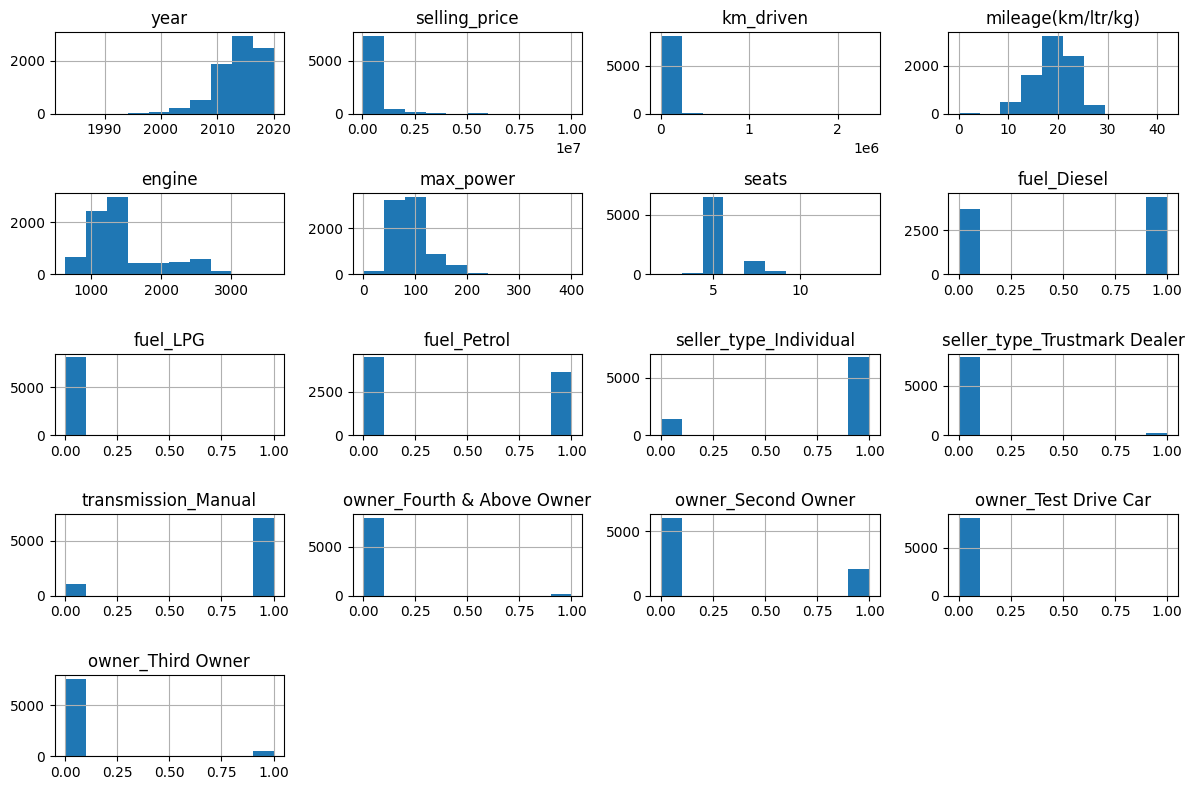

In [301]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


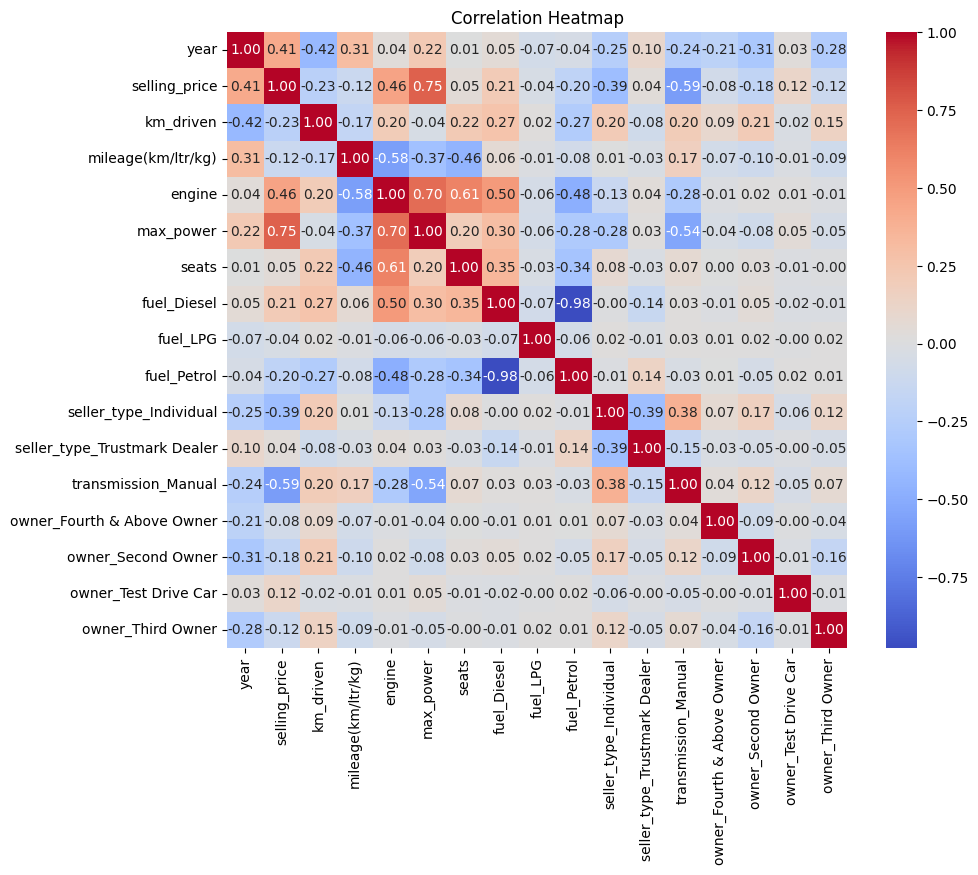

In [302]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


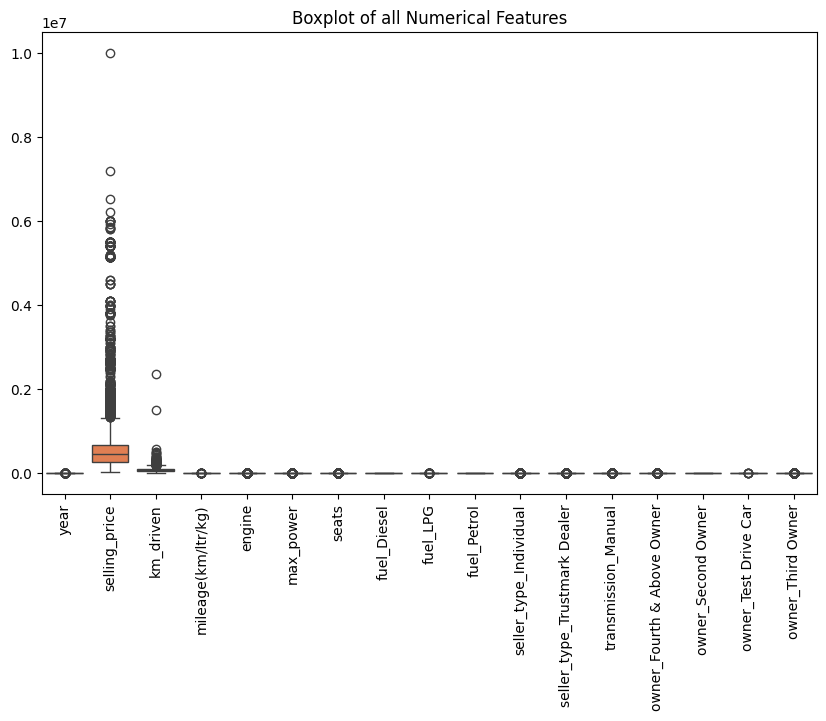

In [303]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of all Numerical Features")
plt.show()


In [304]:
from sklearn.model_selection import train_test_split
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [305]:
X


,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23,1248,74,5,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21,1498,103,5,1,0,0,1,0,1,0,1,0,0
2,2006,140000,17,1497,78,5,0,0,1,1,0,1,0,0,0,1
3,2010,127000,23,1396,90,5,1,0,0,1,0,1,0,0,0,0
4,2007,120000,16,1298,88,5,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,18,1197,82,5,0,0,1,1,0,1,0,0,0,0
8124,2007,119000,16,1493,110,5,1,0,0,1,0,1,1,0,0,0
8125,2009,120000,19,1248,73,5,1,0,0,1,0,1,0,0,0,0
8126,2013,25000,23,1396,70,5,1,0,0,1,0,1,0,0,0,0


In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [308]:
predictions = model.predict(X_test)

In [309]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mean_actual = np.mean(y_test)
accuracy = 100 - (mae / mean_actual * 100)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)
print("Approximate Accuracy (%):", accuracy)


MAE: 73054.86917034446
MSE: 21286584524.526505
R² Score: 0.9675254159940319
Approximate Accuracy (%): 88.52659241279693


In [310]:
import joblib
joblib.dump(model, 'Car_price_pred.pkl')


['Car_price_pred.pkl']

In [311]:
print(model.feature_names_in_)


['year' 'km_driven' 'mileage(km/ltr/kg)' 'engine' 'max_power' 'seats'
 'fuel_Diesel' 'fuel_LPG' 'fuel_Petrol' 'seller_type_Individual'
 'seller_type_Trustmark Dealer' 'transmission_Manual'
 'owner_Fourth & Above Owner' 'owner_Second Owner' 'owner_Test Drive Car'
 'owner_Third Owner']
